In [1]:
!pip install biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 11.5 MB/s eta 0:00:00


In [2]:
cell_lines = ["A549", "BT549", "Caco-2", "H1299", "H5578T", 'HACAT', 'HCT116', "HeLa",
              "HEK293T", "HepG2", "Huh7", "Jurkat", "K562", "MCF-7", "NB4", "SKER3", "SW480",
              "U2OS", "U937", "Hep3B", "HL60", "SKBR3", "HepaRG", "TF-1", "PANC-1", "Hs578T", "T-47D", "ZR-75-1",
              "HCT116", "HT-29", "Hs 578T", "HT1080", "JY", "KBM-7", "KM12", "LAPC4", "NCI-60", "LNCaP",
              "LOX-IMVI", "M14", "MDA-MB-231", "MDA-MB-435", "MDA-MB-453", "MDA-MB-468", "MDA-N", "MIA PaCa-2", "MOLT-4",
              "MRC-5", "NCI-60", "NCI-H23", "NCI-H226", "NCI-H460", "NK-92", 'NTERA-2', "OVCAR-3", "OVCAR-8","PANC-1", "PC3",
              "Raji", "RPMI-7951", "Saos-2" , "SF-268", "SF-539", "SH-SY5Y", "SK-MEL-5", "SK-MEL-28", "SK-OV-3", "SNB-19", "SW-620",
              "T-47D", "T98G", "THP-1", "U-87", "U251", "VCaP", "VG-1", "WI-38", "ZR-75-1", 'NCI-60', 'A431', 'ACHN', 'BCP-1' , 'BOSC23',
              'BT-20', 'BT-549', 'BxPC-3', 'Caki-1', 'Calu-3', 'CCRF-CEM', 'DU145', 'H295R', 'HAP1' , 'HCC-2998', "Calu-3",
              "H9c2(2-1)", "SH-SY5Y"]

# PubMed article

In [30]:
from Bio import Entrez

def search_articles(cell_line, start_year, end_year):
    Entrez.email = "arzumanian.victoria@gmail.com"  # Always provide your email
    query = f"{cell_line}[Title/Abstract] AND ({start_year}[Date - Publication] : {end_year}[Date - Publication])"
    handle = Entrez.esearch(db="pubmed", term=query, retmax=100000)
    record = Entrez.read(handle)
    handle.close()
    return int(record["Count"])

article_counts = {}

for cell_line in cell_lines:
    count = search_articles(cell_line, 2013, 2023)
    article_counts[cell_line] = count

print(article_counts)

{'A549': 25022, 'BT549': 573, 'Caco-2': 10571, 'H1299': 2538, 'H5578T': 0, 'HACAT': 5709, 'HCT116': 9865, 'HeLa': 22807, 'HEK293T': 4463, 'HepG2': 25189, 'Huh7': 4886, 'Jurkat': 3959, 'K562': 5573, 'MCF-7': 23158, 'NB4': 732, 'SKER3': 0, 'SW480': 3232, 'U2OS': 2021, 'U937': 2632, 'Hep3B': 1761, 'HL60': 4268, 'SKBR3': 2022, 'HepaRG': 970, 'TF-1': 301, 'PANC-1': 2688, 'Hs578T': 359, 'T-47D': 453, 'ZR-75-1': 211, 'HT-29': 5529, 'Hs 578T': 69, 'HT1080': 898, 'JY': 185, 'KBM-7': 11, 'KM12': 74, 'LAPC4': 97, 'NCI-60': 542, 'LNCaP': 4233, 'LOX-IMVI': 31, 'M14': 369, 'MDA-MB-231': 15457, 'MDA-MB-435': 388, 'MDA-MB-453': 418, 'MDA-MB-468': 1476, 'MDA-N': 26, 'MIA PaCa-2': 913, 'MOLT-4': 473, 'MRC-5': 1391, 'NCI-H23': 132, 'NCI-H226': 61, 'NCI-H460': 927, 'NK-92': 364, 'NTERA-2': 83, 'OVCAR-3': 745, 'OVCAR-8': 106, 'PC3': 8527, 'Raji': 936, 'RPMI-7951': 36, 'Saos-2': 1443, 'SF-268': 73, 'SF-539': 12, 'SH-SY5Y': 8157, 'SK-MEL-5': 94, 'SK-MEL-28': 385, 'SK-OV-3': 524, 'SNB-19': 61, 'SW-620': 136, 

In [ ]:
import pandas as pd
data=pd.DataFrame.from_dict(article_counts, orient='index')
data

In [32]:
data = data.rename(columns={0: "Num"})
data = data.reset_index().rename(columns={"index": "Cell line"})

In [33]:
df_sorted = data.sort_values(by="Num", ascending=False)

In [47]:
df_top = df_sorted.head(25)

# Aggregate the rest into a sum, create a DataFrame, and set the "Cell line"
sum_row = df_sorted.tail(len(df_sorted) - 25).sum(numeric_only=True).to_frame().T
sum_row["Cell line"] = "Other"

# Append the aggregated row to the top DataFrame
df_final = pd.concat([df_top, sum_row], ignore_index=True)

print(df_final)

     Cell line    Num
0        HepG2  25189
1         A549  25022
2        MCF-7  23158
3         HeLa  22807
4   MDA-MB-231  15457
5       Caco-2  10571
6       HCT116   9865
7        THP-1   9195
8          PC3   8527
9      SH-SY5Y   8157
10       HACAT   5709
11        K562   5573
12       HT-29   5529
13        Huh7   4886
14     HEK293T   4463
15        HL60   4268
16       LNCaP   4233
17      Jurkat   3959
18       DU145   3441
19       SW480   3232
20        U251   2741
21      PANC-1   2688
22        U937   2632
23       H1299   2538
24       SKBR3   2022
25       Other  30149


In [44]:
c= ['darkblue', 'lightblue', 'peru', 'olivedrab', 'palegoldenrod', '#d3a9b7', 'purple', 'lightslategray', 'brown',
    'lightblue', 'black', 'teal', 'tomato', 'gainsboro', 'firebrick', 'peachpuff', 'darkorange', 'darkgrey', 'darkkhaki', 'gold', 'mediumslateblue',
    'violet', 'darkorchid', 'turquoise', 'lime', 'slategrey', 'rosybrown']

c

['darkblue',
 'lightblue',
 'peru',
 'olivedrab',
 'palegoldenrod',
 '#d3a9b7',
 'purple',
 'lightslategray',
 'brown',
 'lightblue',
 'black',
 'teal',
 'tomato',
 'gainsboro',
 'firebrick',
 'peachpuff',
 'darkorange',
 'darkgrey',
 'darkkhaki',
 'gold',
 'mediumslateblue',
 'violet',
 'darkorchid',
 'turquoise',
 'lime',
 'slategrey',
 'rosybrown']

In [ ]:
df_final

<ipython-input-48-e84383684fda>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(df_final['Cell line'], rotation=60, fontweight=15, size=12, horizontalalignment= 'right')
<ipython-input-48-e84383684fda>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


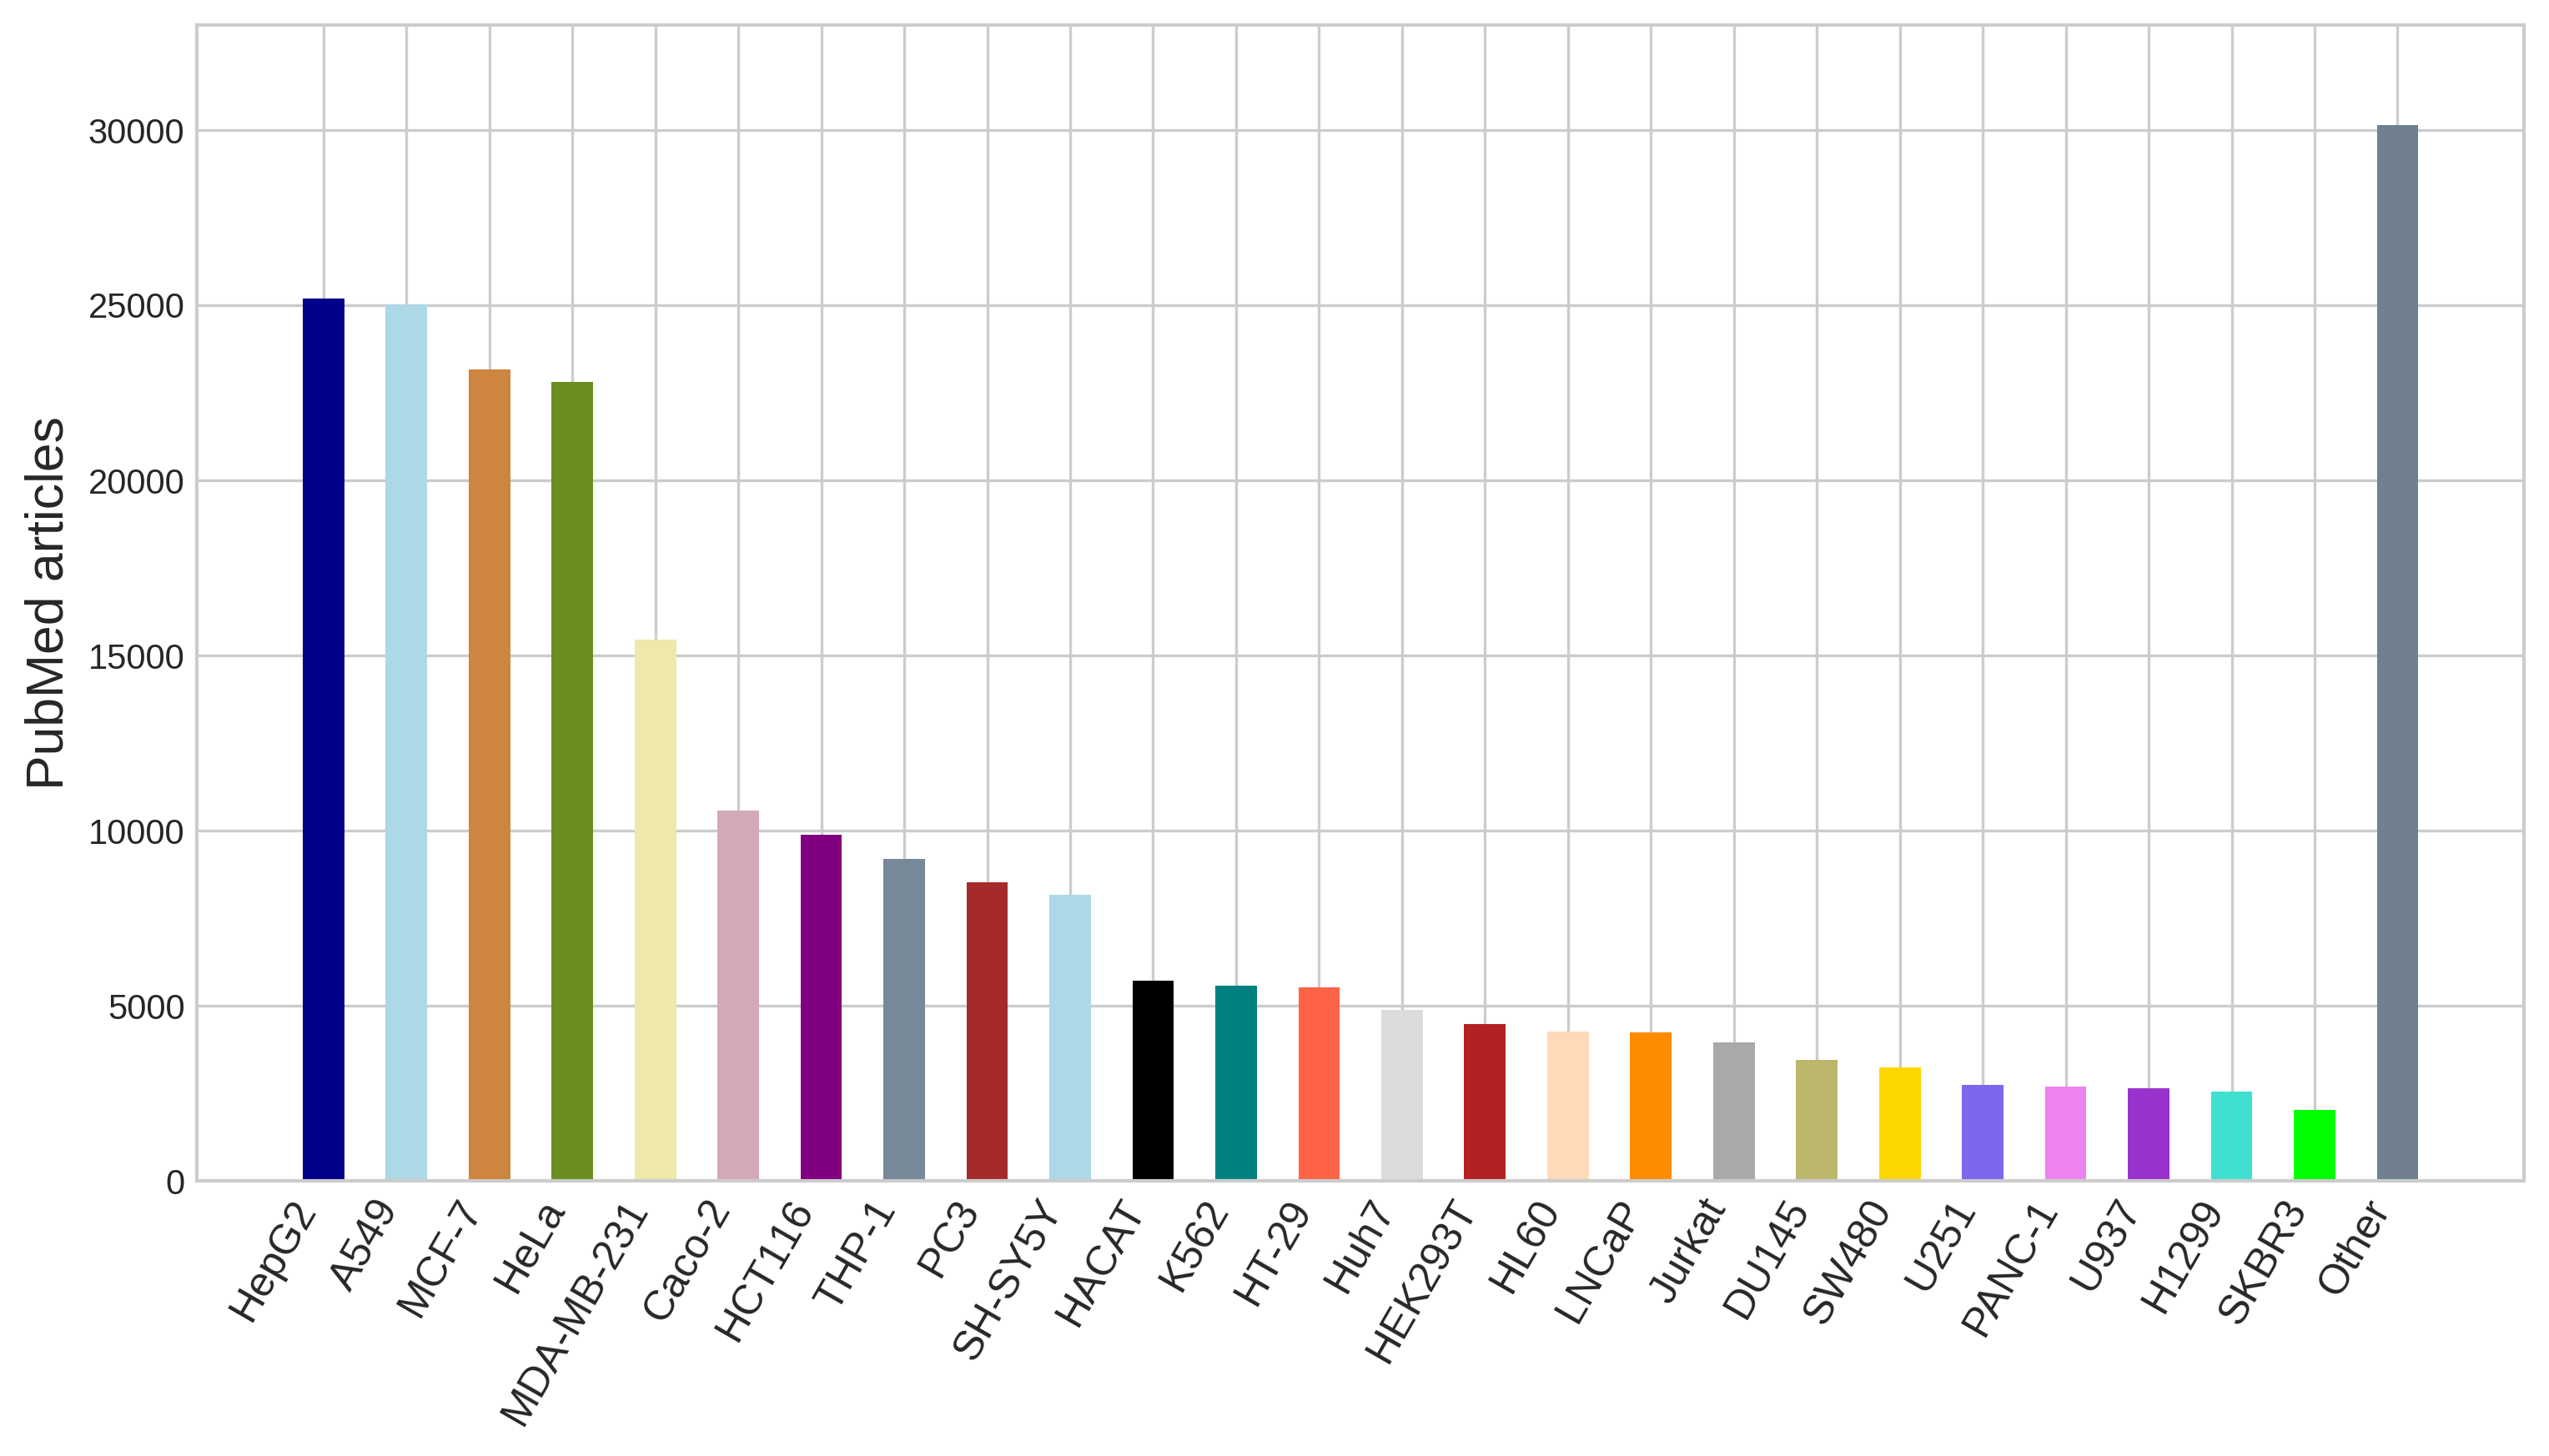

<Figure size 640x480 with 0 Axes>

In [48]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

# Plot Bars
plt.figure(figsize=(12,6), dpi= 300)
plt.bar(df_final['Cell line'], df_final['Num'], color=c, width=.5)

# Decoration
plt.gca().set_xticklabels(df_final['Cell line'], rotation=60, fontweight=15, size=12, horizontalalignment= 'right')
plt.ylabel('PubMed articles', fontsize=15)
plt.ylim(0, 33000)
plt.style.use('seaborn-whitegrid')
plt.show()
plt.savefig('/content/drive/MyDrive/hist_PubMed.png')

# SRA data

In [49]:
from Bio import Entrez

def search_articles(cell_line, start_year, end_year):
    Entrez.email = "arzumanian.victoria@gmail.com"  # Always provide your email
    query = f"{cell_line}[All Fields] AND control[All Fields]) AND (biomol rna[Properties] AND platform illumina[Properties])"
    handle = Entrez.esearch(db="sra", term=query, retmax=100000)
    record = Entrez.read(handle)
    handle.close()
    return int(record["Count"])

article_counts = {}

for cell_line in cell_lines:
    count = search_articles(cell_line, 2013, 2023)
    article_counts[cell_line] = count

print(article_counts)

{'A549': 1272, 'BT549': 71, 'Caco-2': 413, 'H1299': 143, 'H5578T': 0, 'HACAT': 183, 'HCT116': 1280, 'HeLa': 2904, 'HEK293T': 2267, 'HepG2': 1354, 'Huh7': 305, 'Jurkat': 377, 'K562': 942, 'MCF-7': 1721, 'NB4': 49, 'SKER3': 0, 'SW480': 144, 'U2OS': 585, 'U937': 211, 'Hep3B': 66, 'HL60': 61, 'SKBR3': 40, 'HepaRG': 541, 'TF-1': 6, 'PANC-1': 194, 'Hs578T': 16, 'T-47D': 55, 'ZR-75-1': 9, 'HT-29': 147, 'Hs 578T': 23, 'HT1080': 54, 'JY': 9, 'KBM-7': 14, 'KM12': 7, 'LAPC4': 23, 'NCI-60': 3, 'LNCaP': 898, 'LOX-IMVI': 2, 'M14': 76, 'MDA-MB-231': 954, 'MDA-MB-435': 1, 'MDA-MB-453': 16, 'MDA-MB-468': 163, 'MDA-N': 0, 'MIA PaCa-2': 122, 'MOLT-4': 6, 'MRC-5': 25, 'NCI-H23': 7, 'NCI-H226': 9, 'NCI-H460': 21, 'NK-92': 24, 'NTERA-2': 21, 'OVCAR-3': 34, 'OVCAR-8': 59, 'PC3': 572, 'Raji': 126, 'RPMI-7951': 0, 'Saos-2': 27, 'SF-268': 0, 'SF-539': 0, 'SH-SY5Y': 418, 'SK-MEL-5': 0, 'SK-MEL-28': 65, 'SK-OV-3': 0, 'SNB-19': 0, 'SW-620': 0, 'T98G': 47, 'THP-1': 690, 'U-87': 17, 'U251': 116, 'VCaP': 90, 'VG-1': 

In [50]:
import pandas as pd
data=pd.DataFrame.from_dict(article_counts, orient='index')
data

,0
A549,1272
BT549,71
Caco-2,413
H1299,143
H5578T,0
...,...
DU145,85
H295R,47
HAP1,468
HCC-2998,0


In [51]:
data = data.rename(columns={0: "Num"})
data = data.reset_index().rename(columns={"index": "Cell line"})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
df_sorted = data.sort_values(by="Num", ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
df_top = df_sorted.head(25)

# Aggregate the rest into a sum, create a DataFrame, and set the "Cell line"
sum_row = df_sorted.tail(len(df_sorted) - 25).sum(numeric_only=True).to_frame().T
sum_row["Cell line"] = "Other"

# Append the aggregated row to the top DataFrame
df_final = pd.concat([df_top, sum_row], ignore_index=True)

print(df_final)

     Cell line   Num
0         HeLa  2904
1      HEK293T  2267
2        MCF-7  1721
3        HepG2  1354
4       HCT116  1280
5         A549  1272
6   MDA-MB-231   954
7         K562   942
8        LNCaP   898
9        THP-1   690
10        U2OS   585
11         PC3   572
12      HepaRG   541
13        HAP1   468
14     SH-SY5Y   418
15      Caco-2   413
16      Jurkat   377
17        Huh7   305
18        U937   211
19      PANC-1   194
20       HACAT   183
21  MDA-MB-468   163
22       HT-29   147
23       SW480   144
24       H1299   143
25       Other  2048


In [54]:
c= ['darkblue', 'lightblue', 'peru', 'olivedrab', 'palegoldenrod', '#d3a9b7', 'purple', 'lightslategray', 'brown',
    'lightblue', 'black', 'teal', 'tomato', 'gainsboro', 'firebrick', 'peachpuff', 'darkorange', 'darkgrey', 'darkkhaki', 'gold', 'mediumslateblue',
    'violet', 'darkorchid', 'turquoise', 'lime', 'slategrey', 'rosybrown']

c

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['darkblue',
 'lightblue',
 'peru',
 'olivedrab',
 'palegoldenrod',
 '#d3a9b7',
 'purple',
 'lightslategray',
 'brown',
 'lightblue',
 'black',
 'teal',
 'tomato',
 'gainsboro',
 'firebrick',
 'peachpuff',
 'darkorange',
 'darkgrey',
 'darkkhaki',
 'gold',
 'mediumslateblue',
 'violet',
 'darkorchid',
 'turquoise',
 'lime',
 'slategrey',
 'rosybrown']

<ipython-input-57-2806409e49c7>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(df_final['Cell line'], rotation=60, fontweight=15, size=12, horizontalalignment= 'right')
<ipython-input-57-2806409e49c7>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


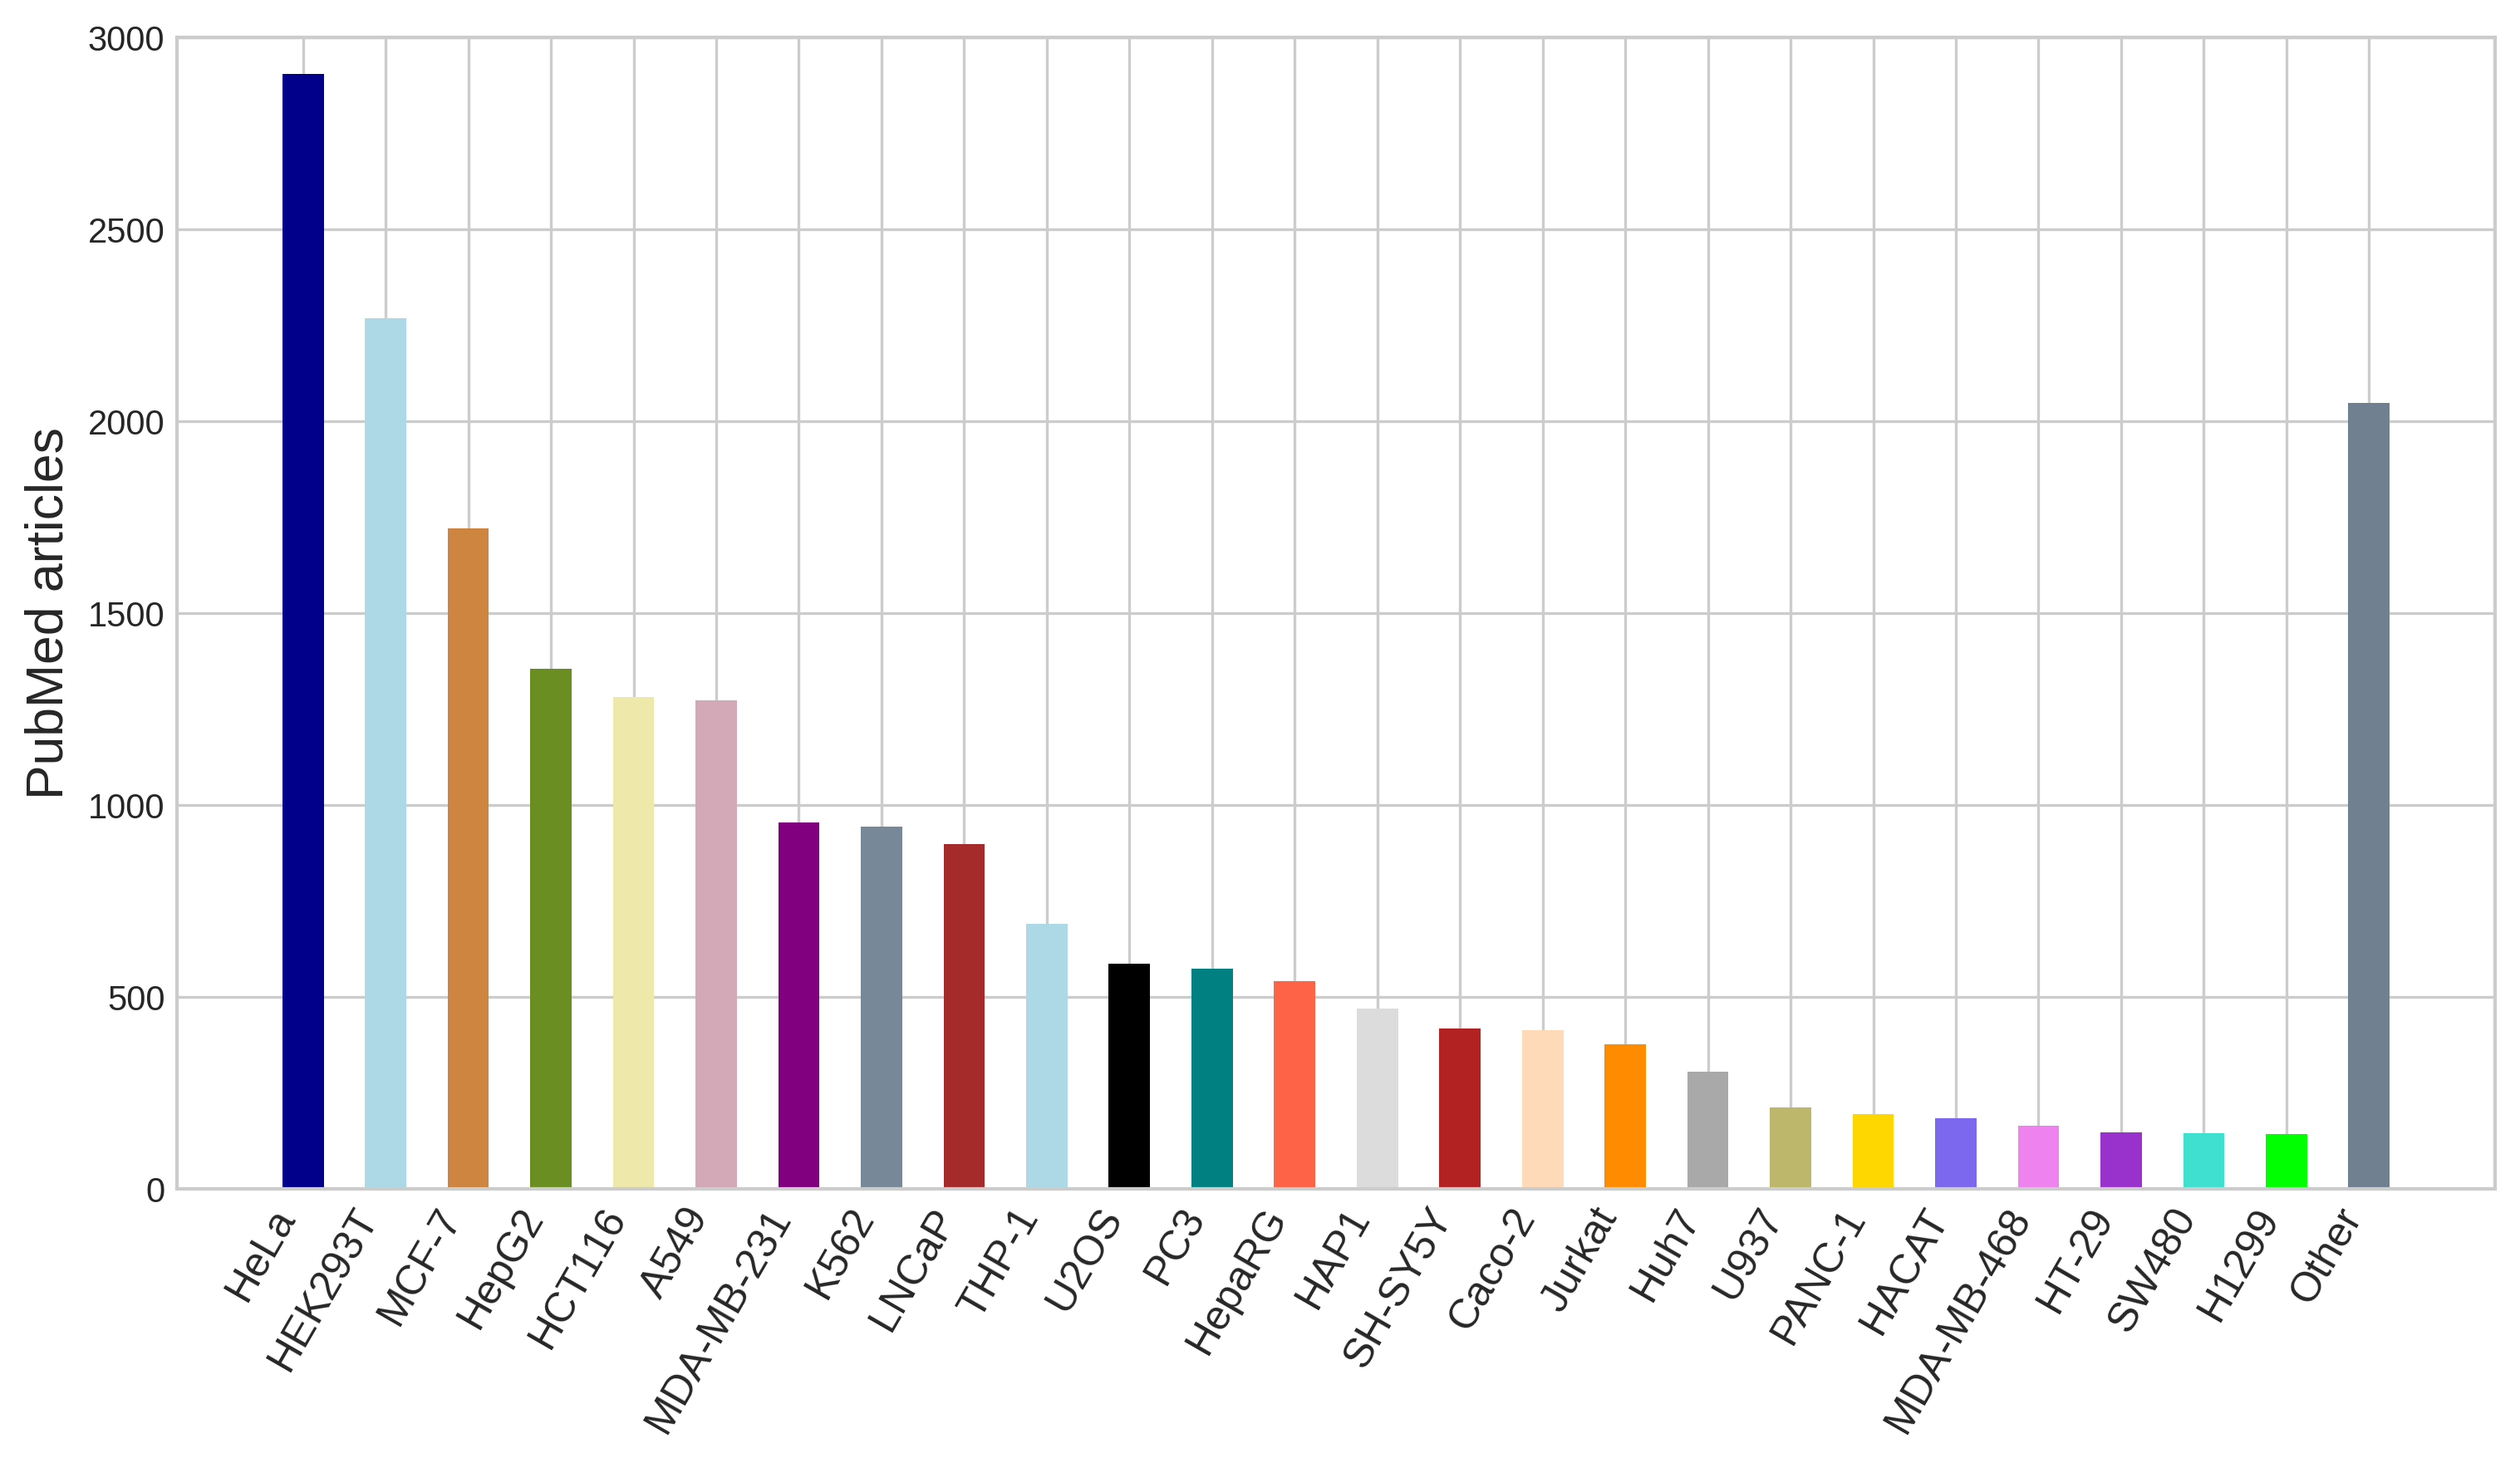

<Figure size 640x480 with 0 Axes>

In [57]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

# Plot Bars
plt.figure(figsize=(12,6), dpi= 300)
plt.bar(df_final['Cell line'], df_final['Num'], color=c, width=.5)

# Decoration
plt.gca().set_xticklabels(df_final['Cell line'], rotation=60, fontweight=15, size=12, horizontalalignment= 'right')
plt.ylabel('PubMed articles', fontsize=15)
plt.ylim(0, 3000)
plt.style.use('seaborn-whitegrid')
plt.show()
plt.savefig('/content/drive/MyDrive/hist_PubMed.png')